In [1]:
import nilearn
import numpy as np
import pandas as pd
from nilearn import plotting
from nilearn import image
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, view_img
from nilearn.glm.first_level import FirstLevelModel
from nilearn.image import concat_imgs, mean_img
from nilearn.plotting import plot_contrast_matrix
import matplotlib.pyplot as plt
from nilearn.glm import threshold_stats_img
from numpy import array
from nilearn.image import concat_imgs, index_img

# General Code for a Single Run

In [2]:
def single_run(image_file, view_file, recall_file, confounds_file):
    events_view = pd.read_csv(view_file, sep='\t')
    events_view['trial_type'] = 'view'
    events_recall = pd.read_csv(recall_file, sep='\t')
    events_recall['trial_type'] = 'recall'
    events = pd.concat([events_view, events_recall])
    confounds = pd.read_csv(confounds_file, sep='\t')

    timings = np.arange(0, len(confounds))
    design_matrix_constant = make_first_level_design_matrix(timings, events, drift_model=None)
    design_matrix = pd.concat([design_matrix_constant, confounds], axis=1)

    view_array = np.zeros(len(design_matrix.columns))
    view_array[1] = 1

    recall_array = np.zeros(len(design_matrix.columns))
    recall_array[0] = 1

    conditions = {
        'view': view_array,
        'recall': recall_array,
    }
    view_minus_recall = conditions['view'] - conditions['recall']
    plot_contrast_matrix(view_minus_recall, design_matrix=design_matrix)

    fmri_imgs = image.load_img(image_file)
    avg_img = mean_img(fmri_imgs)
    
    #Model
    fmri_glm = FirstLevelModel(t_r=1,
                               noise_model='ar1',
                               standardize=False,
                               hrf_model='spm',
                               drift_model=None,
                               high_pass=.01)

    fmri_glm = fmri_glm.fit(fmri_imgs, design_matrices = design_matrix)
    z_map = fmri_glm.compute_contrast(view_minus_recall,
                                      output_type='z_score')

    #Activation Maps
    plot_stat_map(z_map, bg_img=avg_img, threshold=3.0,
                  display_mode='z', cut_coords=3, black_bg=True,
                  title='View minus Recall (Z>3)')
    plt.show()

    _, threshold = threshold_stats_img(z_map, alpha=.001, height_control='fpr')
    print('Uncorrected p<0.001 threshold: %.3f' % threshold)
    plot_stat_map(z_map, bg_img=avg_img, threshold=threshold,
                  display_mode='z', cut_coords=3, black_bg=True,
                  title='View minus Recall (p<0.001)')
    plt.show()

    _, threshold = threshold_stats_img(z_map, alpha=.05, height_control='bonferroni')
    print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
    plot_stat_map(z_map, bg_img=avg_img, threshold=threshold,
                  display_mode='z', cut_coords=3, black_bg=True,
                  title='View minus Recall (p<0.05, corrected)')
    plt.show()
  
    _, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    print('False Discovery rate = 0.05 threshold: %.3f' % threshold)
    plot_stat_map(z_map, bg_img=avg_img, threshold=threshold,
                  display_mode='z', cut_coords=3, black_bg=True,
                  title='View minus Recall (fdr=0.05)')
    plt.show()

    clean_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr', cluster_threshold=10)
    plot_stat_map(clean_map, bg_img=avg_img, threshold=threshold,
                  display_mode='z', cut_coords=3, black_bg=True,
                  title='View minus Recall (fdr=0.05), clusters > 10 voxels')
    plt.show()
  
    view_img(z_map, threshold = 3.0)

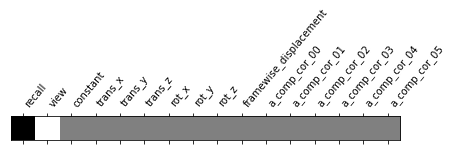

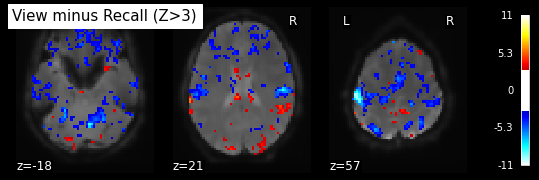

Uncorrected p<0.001 threshold: 3.291


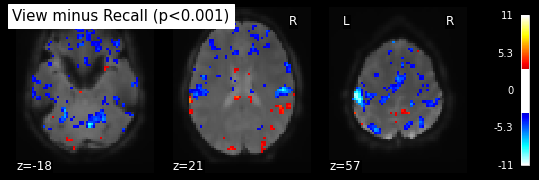

Bonferroni-corrected, p<0.05 threshold: 4.958


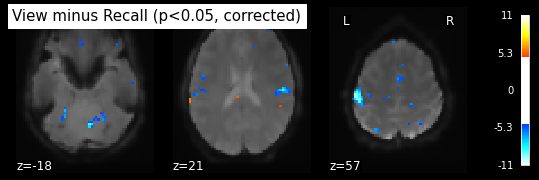

False Discovery rate = 0.05 threshold: 2.567


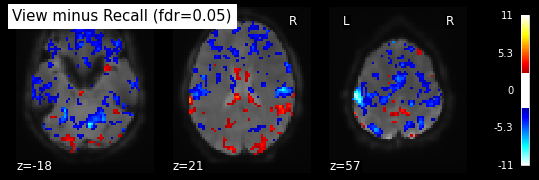

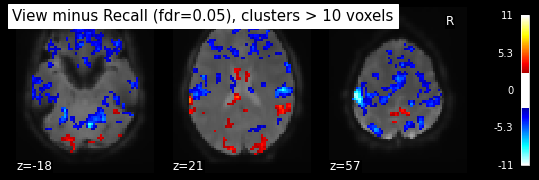

/Users/bradpowell/.local/lib/python3.8/site-packages/nilearn/plotting/html_stat_map.py:219: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [3]:
single_run("/Users/bradpowell/Desktop/sub-01/Functional/run_1.nii.gz", \
           "/Users/bradpowell/Desktop/sub-01/Events/view_1.tsv", \
           "/Users/bradpowell/Desktop/sub-01/Events/recall_1.tsv", \
           "/Users/bradpowell/Desktop/sub-01/Functional/confounds_1.txt")

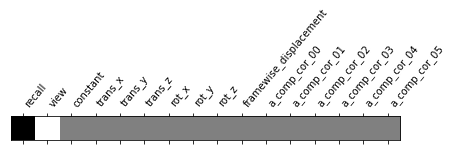

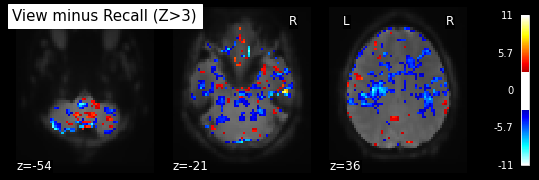

Uncorrected p<0.001 threshold: 3.291


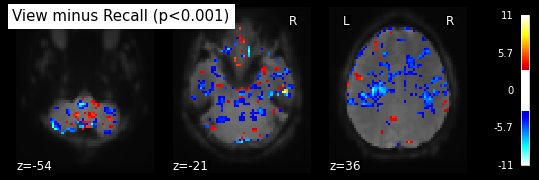

Bonferroni-corrected, p<0.05 threshold: 4.944


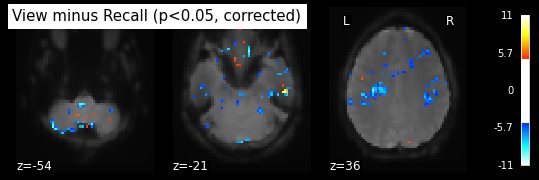

False Discovery rate = 0.05 threshold: 2.383


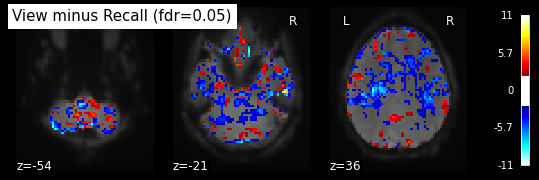

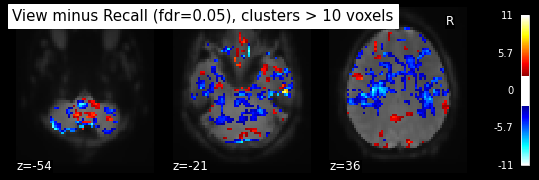

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [4]:
single_run("/Users/bradpowell/Desktop/sub-01/Functional/run_2.nii.gz", \
           "/Users/bradpowell/Desktop/sub-01/Events/view_2.tsv", \
           "/Users/bradpowell/Desktop/sub-01/Events/recall_2.tsv", \
           "/Users/bradpowell/Desktop/sub-01/Functional/confounds_2.txt")

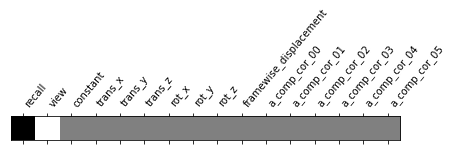

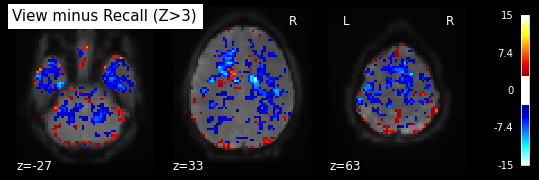

Uncorrected p<0.001 threshold: 3.291


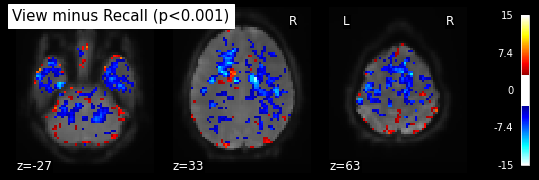

Bonferroni-corrected, p<0.05 threshold: 4.947


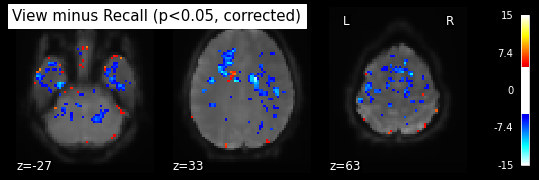

False Discovery rate = 0.05 threshold: 2.301


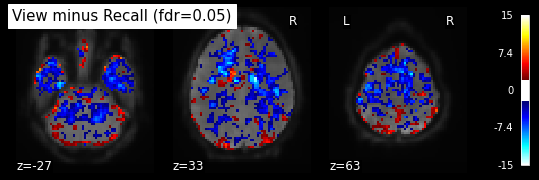

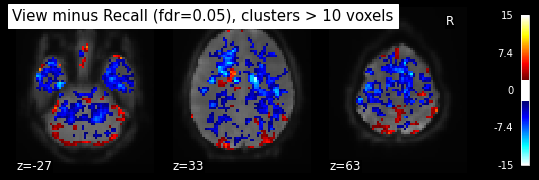

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [5]:
single_run("/Users/bradpowell/Desktop/sub-01/Functional/run_3.nii.gz", \
           "/Users/bradpowell/Desktop/sub-01/Events/view_3.tsv", \
           "/Users/bradpowell/Desktop/sub-01/Events/recall_3.tsv", \
           "/Users/bradpowell/Desktop/sub-01/Functional/confounds_3.txt")

# Creating Test Data

In [6]:
fmri_imgs = image.load_img("/Users/bradpowell/Desktop/sub-01/Functional/run_1.nii.gz")
test_data = index_img(fmri_imgs, slice(0, 5))

In [7]:
events_view = pd.DataFrame([[10, 400, 'view'], 
                            [430, 400, 'view'],
                            [850, 300, 'view']],
                            columns=['onset', 'duration', 'trial_type'])
events_view

,onset,duration,trial_type
0,10,400,view
1,430,400,view
2,850,300,view


In [8]:
events_recall = pd.DataFrame([[10, 300, 'recall'],
                              [310, 200, 'recall'],
                              [510, 200, 'recall']],
                              columns=['onset', 'duration', 'trial_type'])
events_recall

,onset,duration,trial_type
0,10,300,recall
1,310,200,recall
2,510,200,recall


In [9]:
confounds = pd.read_csv("/Users/bradpowell/Desktop/sub-01/Functional/confounds_1.txt", sep='\t')
confounds = confounds.head(5)
confounds

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,framewise_displacement,a_comp_cor_00,a_comp_cor_01,a_comp_cor_02,a_comp_cor_03,a_comp_cor_04,a_comp_cor_05
0,0.002519,0.034484,0.042679,-0.000359,-0.000000,-0.000139,0.184626,-0.022284,0.033514,-0.003216,0.022537,-0.032533,0.047717
1,0.003481,-0.002960,0.012715,-0.000131,0.000179,-0.000213,0.092373,-0.008061,0.045153,0.005634,0.008764,-0.012524,0.030110
2,0.012793,-0.038440,0.009092,0.000264,-0.000000,0.000000,0.087703,0.007425,0.041236,0.006669,0.010797,-0.031716,-0.004556
3,0.011578,0.048193,0.034242,-0.000186,-0.000350,0.000000,0.152991,0.024364,0.032227,0.007002,0.023704,-0.022913,0.035918
4,0.018857,-0.064000,0.011894,0.000035,-0.000200,0.000164,0.168560,0.046522,-0.015562,-0.020857,0.034018,-0.029913,-0.047896


In [10]:
events_view.to_csv('events_view.tsv', index = False, sep = '\t')
events_recall.to_csv('events_recall.tsv', index = False, sep = '\t')
confounds.to_csv('confounds.txt', index = False, sep = '\t')
test_data.to_filename('test_data.nii.gz')